# 4.10A Final Project

01. Importing Libraries
02. Importing Dataframes
03. Data Security Precautions
04. Customer Behavior Insights

Continued in '4.10B Final Project'

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Dataframes

In [2]:
# Define path
path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Python\03-2022 Instacart Basket Analysis'

In [3]:
# Import most recent Instacart dataframe as df
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v1.pkl'))

In [4]:
# Import departments dataframe
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

# 03. Data Security Precautions

In [5]:
# Removing limit on number of columns shown
pd.options.display.max_columns = None

In [6]:
# 'Name' is PII and should be removed
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Name,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Linda Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [7]:
# Removing 'Name' column
df = df.drop(columns = ['Name'])

# 04. Customer Behavior Insights

Customer Spending Behavior by Geographic Region

In [8]:
# Creating subset of df rendering each unique user to a single row, and preserving only key info
df_spenders = df[['user_id', 'State', 'spending_flag']]

In [9]:
df_spenders.head()

,user_id,State,spending_flag
0,1,Alabama,Low spender
1,1,Alabama,Low spender
2,1,Alabama,Low spender
3,1,Alabama,Low spender
4,1,Alabama,Low spender


In [10]:
df_spenders = df_spenders.drop_duplicates()

In [11]:
df_spenders

,user_id,State,spending_flag
0,1,Alabama,Low spender
59,2,Alaska,Low spender
254,3,Arizona,Low spender
342,4,Arkansas,Low spender
360,5,California,Low spender
...,...,...,...
32428586,206205,Hawaii,Low spender
32428618,206206,Idaho,Low spender
32428903,206207,Illinois,Low spender
32429126,206208,Indiana,Low spender


In [12]:
# Checking that all State names are consistent
df_spenders['State'].value_counts()

Alabama                 4044
District of Columbia    4044
Iowa                    4044
Indiana                 4044
Illinois                4044
Idaho                   4044
Georgia                 4044
Florida                 4044
Hawaii                  4044
Delaware                4044
Connecticut             4044
Colorado                4044
California              4044
Arkansas                4044
Arizona                 4044
Alaska                  4044
South Dakota            4043
Minnesota               4043
Mississippi             4043
Missouri                4043
Pennsylvania            4043
Rhode Island            4043
South Carolina          4043
Wisconsin               4043
Tennessee               4043
Texas                   4043
Utah                    4043
Vermont                 4043
Virginia                4043
Washington              4043
West Virginia           4043
Massachusetts           4043
Michigan                4043
New Mexico              4043
Maryland      

In [13]:
# Creating region object based on State
region = []
for state in df_spenders['State']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        region.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region.append('South')
    elif state in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        region.append('West')
    else:
        region.append('Unknown')

In [14]:
# Turning region object into Region column in subset dataframe
df_spenders['Region'] = region

In [15]:
df_spenders['Region'].value_counts()

South        68737
West         52565
Midwest      48519
Northeast    36388
Name: Region, dtype: int64

In [16]:
df_spenders['Region'].value_counts().sum()

206209

In [17]:
# List of normalized region percentages
spenders_normalized_data = df_spenders['Region'].value_counts(normalize=True)

In [18]:
spenders_normalized_data

South        0.333337
West         0.254911
Midwest      0.235290
Northeast    0.176462
Name: Region, dtype: float64

In [19]:
# Appending normalized region counts onto itself in preparation for upcoming table
spenders_normalized_data = spenders_normalized_data.append(spenders_normalized_data)

In [20]:
# Taking steps to add a header to spenders normalized data
spenders_normalized_data = spenders_normalized_data.reset_index()

In [21]:
snd_header = ['Region', 'normalized_percent']

In [22]:
spenders_normalized_data

,index,Region
0,South,0.333337
1,West,0.254911
2,Midwest,0.235290
3,Northeast,0.176462
4,South,0.333337
5,West,0.254911
6,Midwest,0.235290
7,Northeast,0.176462


In [23]:
spenders_normalized_data.columns = snd_header

In [24]:
spenders_normalized_data

,Region,normalized_percent
0,South,0.333337
1,West,0.254911
2,Midwest,0.235290
3,Northeast,0.176462
4,South,0.333337
5,West,0.254911
6,Midwest,0.235290
7,Northeast,0.176462


In [25]:
# Table demonstrating High and Low spender counts by Region
spenders_by_region = df_spenders.groupby('spending_flag').agg({'Region' : ['value_counts']})

In [26]:
spenders_by_region

Region
                        value_counts
spending_flag Region                
High spender  South             1141
              West               902
              Midwest            801
              Northeast          545
Low spender   South            67596
              West             51663
              Midwest          47718
              Northeast        35843

In [27]:
# Taking steps to arrange spenders_by_region into a table
spenders_by_region = spenders_by_region.reset_index()

In [28]:
spenders_by_region

spending_flag     Region             
                           value_counts
0  High spender      South         1141
1  High spender       West          902
2  High spender    Midwest          801
3  High spender  Northeast          545
4   Low spender      South        67596
5   Low spender       West        51663
6   Low spender    Midwest        47718
7   Low spender  Northeast        35843

In [29]:
spenders_by_region.columns

MultiIndex([('spending_flag',             ''),
            (       'Region',             ''),
            (       'Region', 'value_counts')],
           )

In [30]:
# Adding real Region value counts to spenders normalized data
spenders_normalized_data['value_counts'] = spenders_by_region['Region', 'value_counts']

In [31]:
spenders_normalized_data['spending_flag'] = spenders_by_region['spending_flag']

In [32]:
spenders_normalized_data

,Region,normalized_percent,value_counts,spending_flag
0,South,0.333337,1141,High spender
1,West,0.254911,902,High spender
2,Midwest,0.235290,801,High spender
3,Northeast,0.176462,545,High spender
4,South,0.333337,67596,Low spender
5,West,0.254911,51663,Low spender
6,Midwest,0.235290,47718,Low spender
7,Northeast,0.176462,35843,Low spender


Text(0.5, 1.0, 'High and Low Spenders per Region')

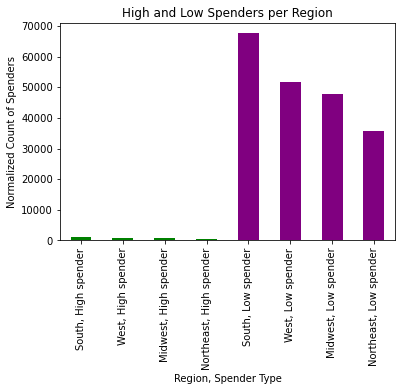

In [33]:
# Creating bar chart displaying high and low spenders per region side by side, and based on a normalized count
high_low_spenders_bar = spenders_normalized_data['value_counts'].plot.bar(color = ['green', 'green', 'green', 'green', 'purple', 'purple', 'purple', 'purple'])
high_low_spenders_bar.set_xticklabels(['South, High spender', 'West, High spender', 'Midwest, High spender', 'Northeast, High spender', 'South, Low spender', 'West, Low spender', 'Midwest, Low spender', 'Northeast, Low spender'])
high_low_spenders_bar.set_xlabel('Region, Spender Type')
high_low_spenders_bar.set_ylabel('Normalized Count of Spenders')
high_low_spenders_bar.set_title('High and Low Spenders per Region')

In [34]:
# Exporting viz
high_low_spenders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'High Low Spenders Bar Chart.png'))

In [35]:
# Dividing spenders normalized data into low and high spender categories (low)
low_spenders_normalized = spenders_normalized_data[spenders_normalized_data['spending_flag'] == 'Low spender']

In [36]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag
4,South,0.333337,67596,Low spender
5,West,0.254911,51663,Low spender
6,Midwest,0.235290,47718,Low spender
7,Northeast,0.176462,35843,Low spender


In [37]:
# Dividing spenders normalized data into low and high spender categories (high)
high_spenders_normalized = spenders_normalized_data[spenders_normalized_data['spending_flag'] == 'High spender']

In [38]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag
0,South,0.333337,1141,High spender
1,West,0.254911,902,High spender
2,Midwest,0.235290,801,High spender
3,Northeast,0.176462,545,High spender


In [39]:
# Creating total_high_spenders column
high_spenders_normalized['total_high_spenders'] = high_spenders_normalized['value_counts'].sum()

C:\Users\Lex\AppData\Local\Temp/ipykernel_9860/3011074825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders_normalized['total_high_spenders'] = high_spenders_normalized['value_counts'].sum()


In [40]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,total_high_spenders
0,South,0.333337,1141,High spender,3389
1,West,0.254911,902,High spender,3389
2,Midwest,0.235290,801,High spender,3389
3,Northeast,0.176462,545,High spender,3389


In [41]:
# Creating percent_high_spenders column
high_spenders_normalized['percent_high_spenders'] = (high_spenders_normalized['value_counts'])/(high_spenders_normalized['total_high_spenders'])

C:\Users\Lex\AppData\Local\Temp/ipykernel_9860/3457494831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders_normalized['percent_high_spenders'] = (high_spenders_normalized['value_counts'])/(high_spenders_normalized['total_high_spenders'])


In [42]:
high_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,total_high_spenders,percent_high_spenders
0,South,0.333337,1141,High spender,3389,0.336677
1,West,0.254911,902,High spender,3389,0.266155
2,Midwest,0.235290,801,High spender,3389,0.236353
3,Northeast,0.176462,545,High spender,3389,0.160814


In [43]:
# Creating total_low_spenders column
low_spenders_normalized['total_low_spenders'] = low_spenders_normalized['value_counts'].sum()

C:\Users\Lex\AppData\Local\Temp/ipykernel_9860/1931910400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders_normalized['total_low_spenders'] = low_spenders_normalized['value_counts'].sum()


In [44]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,total_low_spenders
4,South,0.333337,67596,Low spender,202820
5,West,0.254911,51663,Low spender,202820
6,Midwest,0.235290,47718,Low spender,202820
7,Northeast,0.176462,35843,Low spender,202820


In [45]:
# Creating percent_low_spenders column
low_spenders_normalized['percent_low_spenders'] = (low_spenders_normalized['value_counts'])/(low_spenders_normalized['total_low_spenders'])

C:\Users\Lex\AppData\Local\Temp/ipykernel_9860/1362395274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders_normalized['percent_low_spenders'] = (low_spenders_normalized['value_counts'])/(low_spenders_normalized['total_low_spenders'])


In [46]:
low_spenders_normalized

,Region,normalized_percent,value_counts,spending_flag,total_low_spenders,percent_low_spenders
4,South,0.333337,67596,Low spender,202820,0.333281
5,West,0.254911,51663,Low spender,202820,0.254723
6,Midwest,0.235290,47718,Low spender,202820,0.235273
7,Northeast,0.176462,35843,Low spender,202820,0.176723


Text(0.5, 1.0, 'Proportion of High Spenders by Region')

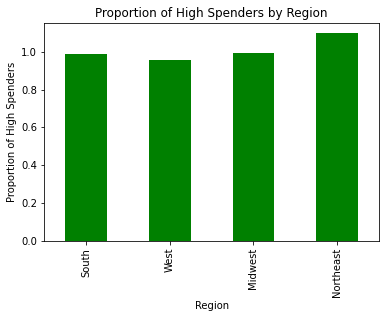

In [47]:
# Create Proportion of High Spenders by Region bar graph
high_spenders_bar = (high_spenders_normalized['normalized_percent']/high_spenders_normalized['percent_high_spenders']).plot.bar(color = 'green')
high_spenders_bar.set_xticklabels(high_spenders_normalized['Region'])
high_spenders_bar.set_xlabel('Region')
high_spenders_bar.set_ylabel('Proportion of High Spenders')
high_spenders_bar.set_title('Proportion of High Spenders by Region')

In [48]:
# Exporting viz
high_spenders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'High Spenders Bar Chart.png'))

Text(0.5, 1.0, 'Proportion of Low Spenders by Region')

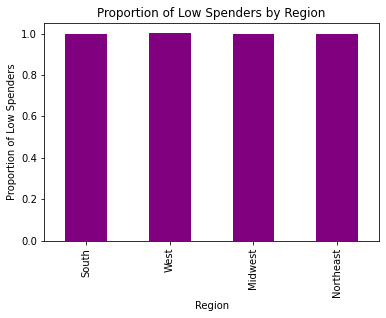

In [49]:
# Create Proportion of Low Spenders by Region bar graph
low_spenders_bar = (low_spenders_normalized['normalized_percent']/low_spenders_normalized['percent_low_spenders']).plot.bar(color = 'purple')
low_spenders_bar.set_xticklabels(low_spenders_normalized['Region'])
low_spenders_bar.set_xlabel('Region')
low_spenders_bar.set_ylabel('Proportion of Low Spenders')
low_spenders_bar.set_title('Proportion of Low Spenders by Region')

In [50]:
# Exporting viz
low_spenders_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Low Spenders Bar Chart.png'))

Excluding Low-Activity Customers

In [51]:
# Re-creating max_order column
df['max_order'] = df.groupby(['user_id'])['order_number'].transform(np.max)

In [52]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10
1,2539329,1,1,2,8,NaN,True,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10
4,2539329,1,1,2,8,NaN,True,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,Regularly busy,Average orders,New customer,Low spender,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,10


In [53]:
# Any rows representing users who've made fewer than 5 orders are flagged as 'Low-Activity'
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low-Activity'
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'Customer of Interest'

In [54]:
# Checking that the exclusion flag worked
df.loc[df['exclusion_flag'] == 'Low-Activity']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,exclusion_flag
360,2717275,5,1,3,12,NaN,True,15349,1,0,Organic Raw Agave Nectar,29.0,13.0,10.7,Mid-range product,Slowest days,Most orders,New customer,Low spender,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,4,Low-Activity
361,2717275,5,1,3,12,NaN,True,21413,2,0,Organic Soba,66.0,6.0,6.7,Mid-range product,Slowest days,Most orders,New customer,Low spender,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,4,Low-Activity
362,2717275,5,1,3,12,NaN,True,48775,3,0,Organic Red Cabbage,83.0,4.0,7.4,Mid-range product,Slowest days,Most orders,New customer,Low spender,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,4,Low-Activity
363,2717275,5,1,3,12,NaN,True,28289,4,0,Organic Shredded Carrots,123.0,4.0,3.2,Low-range product,Slowest days,Most orders,New customer,Low spender,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,4,Low-Activity
364,2717275,5,1,3,12,NaN,True,8518,5,0,Organic Red Onion,83.0,4.0,6.3,Mid-range product,Slowest days,Most orders,New customer,Low spender,Regular customer,Female,California,75,10/8/2018,0,divorced/widowed,115242,4,Low-Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32428613,414137,206205,3,5,16,10.0,False,43352,3,1,Raspberries,32.0,4.0,1.4,Low-range product,Regularly busy,Most orders,New customer,Low spender,Non-frequent customer,Female,Hawaii,38,9/8/2019,2,married,99402,3,Low-Activity
32428614,414137,206205,3,5,16,10.0,False,3896,4,1,Organic Honey Sweet Whole Wheat Bread,112.0,3.0,9.2,Mid-range product,Regularly busy,Most orders,New customer,Low spender,Non-frequent customer,Female,Hawaii,38,9/8/2019,2,married,99402,3,Low-Activity
32428615,414137,206205,3,5,16,10.0,False,19173,5,0,Orange Calcium & Vitamin D Pulp Free,98.0,7.0,5.2,Mid-range product,Regularly busy,Most orders,New customer,Low spender,Non-frequent customer,Female,Hawaii,38,9/8/2019,2,married,99402,3,Low-Activity
32428616,414137,206205,3,5,16,10.0,False,22035,6,1,Organic Whole String Cheese,21.0,16.0,9.0,Mid-range product,Regularly busy,Most orders,New customer,Low spender,Non-frequent customer,Female,Hawaii,38,9/8/2019,2,married,99402,3,Low-Activity


In [55]:
# Creating subset only including customers of interest
df_high_actv = df[df['exclusion_flag'] == 'Customer of Interest']

In [56]:
# Checking that there are no low-activity customers on this subset
df_high_actv.loc[df_high_actv['exclusion_flag'] == 'Low-Activity']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_period_of_day,loyalty_flag,spending_flag,frequency_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,max_order,exclusion_flag


In [57]:
# Removing exclusion flag now that its job is done
df_high_actv = df_high_actv.drop(columns = 'exclusion_flag')

Notebook is taking up too much memory. Final steps for this notebook before moving onto a second notebook:

In [58]:
# Preserving Region variable in new high-activity-only dataframe
region_2 = []
for state in df_high_actv['State']:
    if state in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'):
        region_2.append('Northeast')
    elif state in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        region_2.append('Midwest')
    elif state in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        region_2.append('South')
    elif state in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii'):
        region_2.append('West')
    else:
        region_2.append('Unknown')

In [59]:
df_high_actv['Region'] = region_2

In [60]:
df_high_actv.shape

(30988612, 29)

In [ ]:
# Exporting the new subset to pickle
df_high_actv.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataframe_v2.pkl'))